# DATASET ABALONE

- Antônio Joabe
- João Pedro
- Jônatas Brito

In [44]:
!pip install pandas
!pip install scipy
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering


# Objetivo: importar bibliotecas essenciais para análise, visualização e normalização dos dados.


## Carregamento e informações do Dataset

In [46]:
column_names = ['Sex', 'Length', 'Diameter', 'Height', 
                'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 
                'ShellWeight', 'Rings']

df = pd.read_csv("abalone.data", header=None, names=column_names)

# Carregamento do arquivo `abalone.data` com nomes de colunas definidos

In [47]:
df.head()


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [49]:
df.describe()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [50]:
df.isnull().sum()

# Confirmação se há ou não valores nulos no dataset

Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64


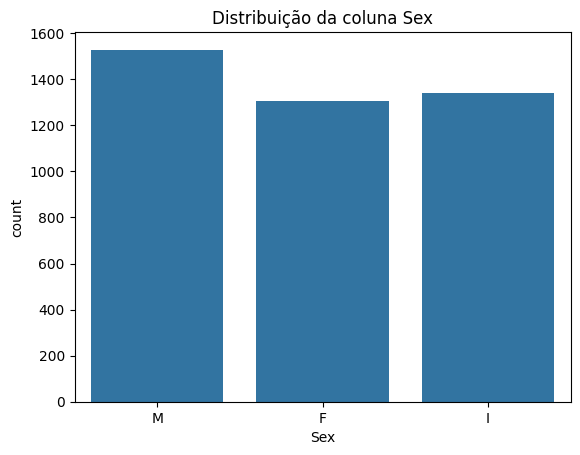

In [51]:
print(df['Sex'].value_counts())

sns.countplot(x='Sex', data=df)
plt.title('Distribuição da coluna Sex')
plt.show()

# Visualização da distribuição das categorias M, F e I (infant)


## Visualização dos Outliers

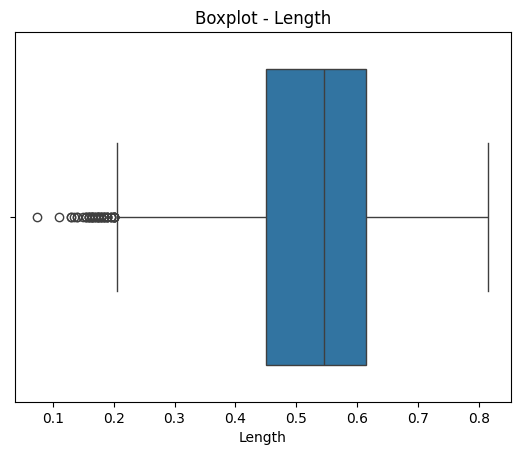

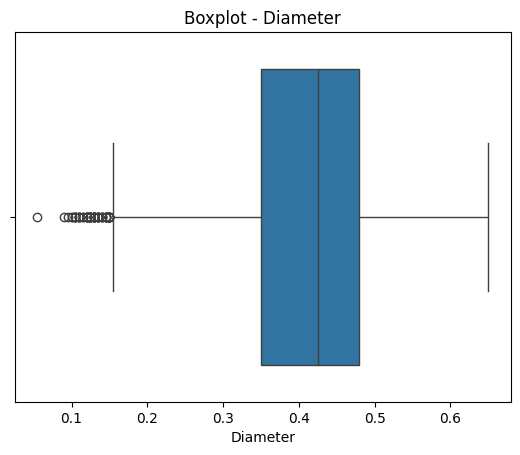

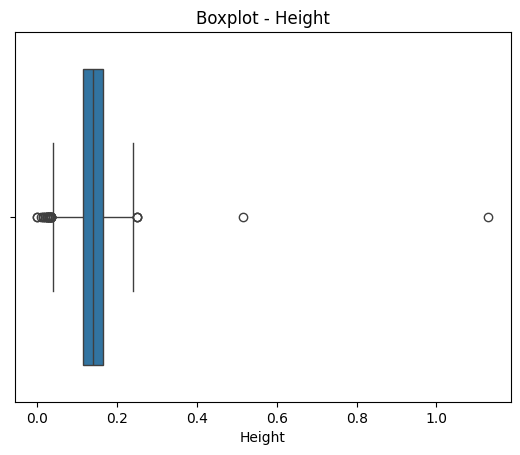

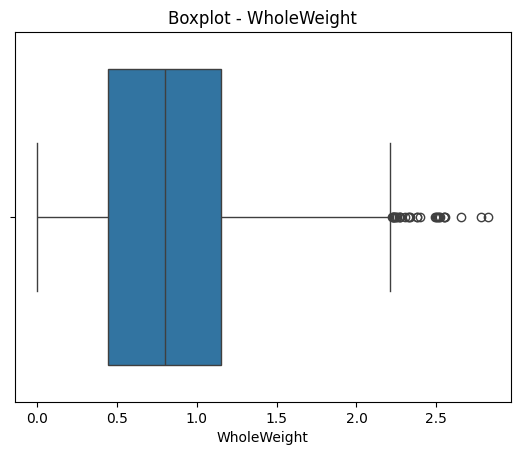

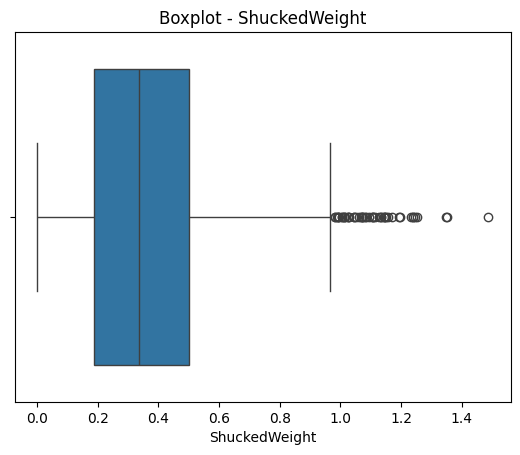

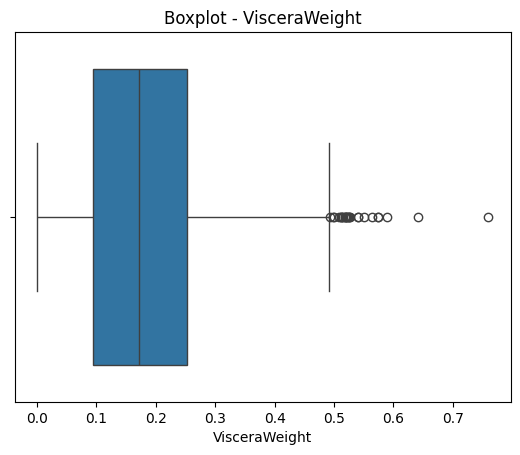

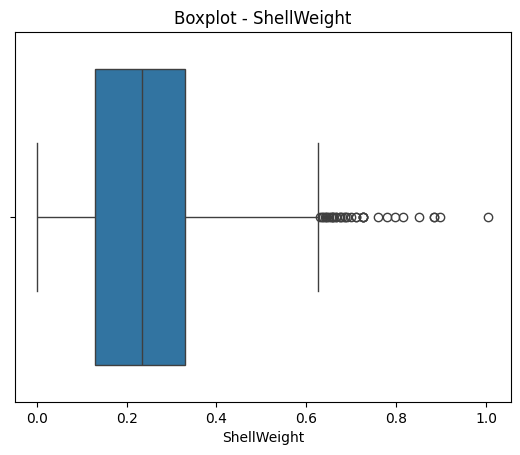

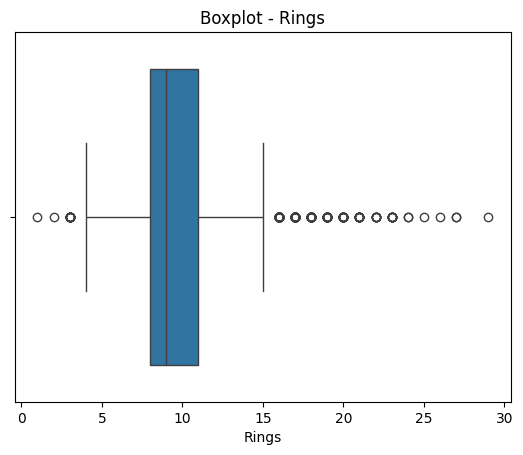

In [52]:
num_features = df.columns[1:]
for col in num_features:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()

# Geração de boxplots para cada variável numérica para a visualização de outliers


In [53]:
df_clean = df.copy()

numeric_features = ['Length', 'Diameter', 'Height', 
                'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 
                'ShellWeight',]
categorical_features = ['Sex']

#Organização de dos dados em listas para serem tratados separadamente


## Tratamento dos Outliers

In [54]:
# Função para remover outliers com base no método IQR (intervalo interquartil)
# Apenas mantém as linhas onde todos os valores numéricos estão dentro dos limites definidos
def remove_outliers_iqr_corrigido(df, columns):
    df_out = df.copy()

    limites = {}
    for col in columns:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        limites[col] = (limite_inferior, limite_superior)

    # Uma linha é mantida se TODOS os seus valores estiverem dentro dos respectivos limites.
    mascara_outliers = pd.Series([True] * len(df_out), index=df_out.index)
    for col in columns:
        lim_inf, lim_sup = limites[col]
        mascara_outliers &= (df_out[col] >= lim_inf) & (df_out[col] <= lim_sup)

    return df_out[mascara_outliers]

print(f"Tamanho original do DataFrame: {df.shape}")
df_clean = remove_outliers_iqr_corrigido(df_clean, numeric_features)
print(f"Tamanho do DataFrame após remoção de outliers: {df_clean.shape}")

Tamanho original do DataFrame: (4177, 9)
Tamanho do DataFrame após remoção de outliers: (4024, 9)


## Pré-Processamento

In [55]:
# Define um preprocessador para normalizar os dados numéricos e transformar as categorias em one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ],
)

# Aplica o transformador ao subconjunto do DataFrame com colunas selecionadas
df_for_transforming = df_clean[numeric_features+categorical_features]
X_processed = preprocessor.fit_transform(df_for_transforming)

new_columns = preprocessor.get_feature_names_out()

df_processed_scaled = pd.DataFrame(X_processed, columns=new_columns)

new_columns_with_prefix = preprocessor.get_feature_names_out()

cleaned_columns = [col.split('__')[1] for col in new_columns_with_prefix]

df_processed_scaled = pd.DataFrame(X_processed, columns=cleaned_columns)

df_processed_scaled.head()


,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Sex_F,Sex_I,Sex_M
0,-0.632245,-0.474574,-1.23997,-0.666150,-0.631483,-0.753592,-0.665126,0.0,0.0,1.0
1,-1.580579,-1.562434,-1.38003,-1.310363,-1.251442,-1.270933,-1.296032,0.0,0.0,1.0
2,0.045136,0.123750,-0.11949,-0.302174,-0.472773,-0.354500,-0.191946,1.0,0.0,0.0
3,-0.767721,-0.474574,-0.39961,-0.661684,-0.676120,-0.625488,-0.625694,0.0,0.0,1.0
4,-1.761214,-1.671220,-1.66015,-1.356139,-1.301038,-1.359620,-1.414327,0.0,1.0,0.0


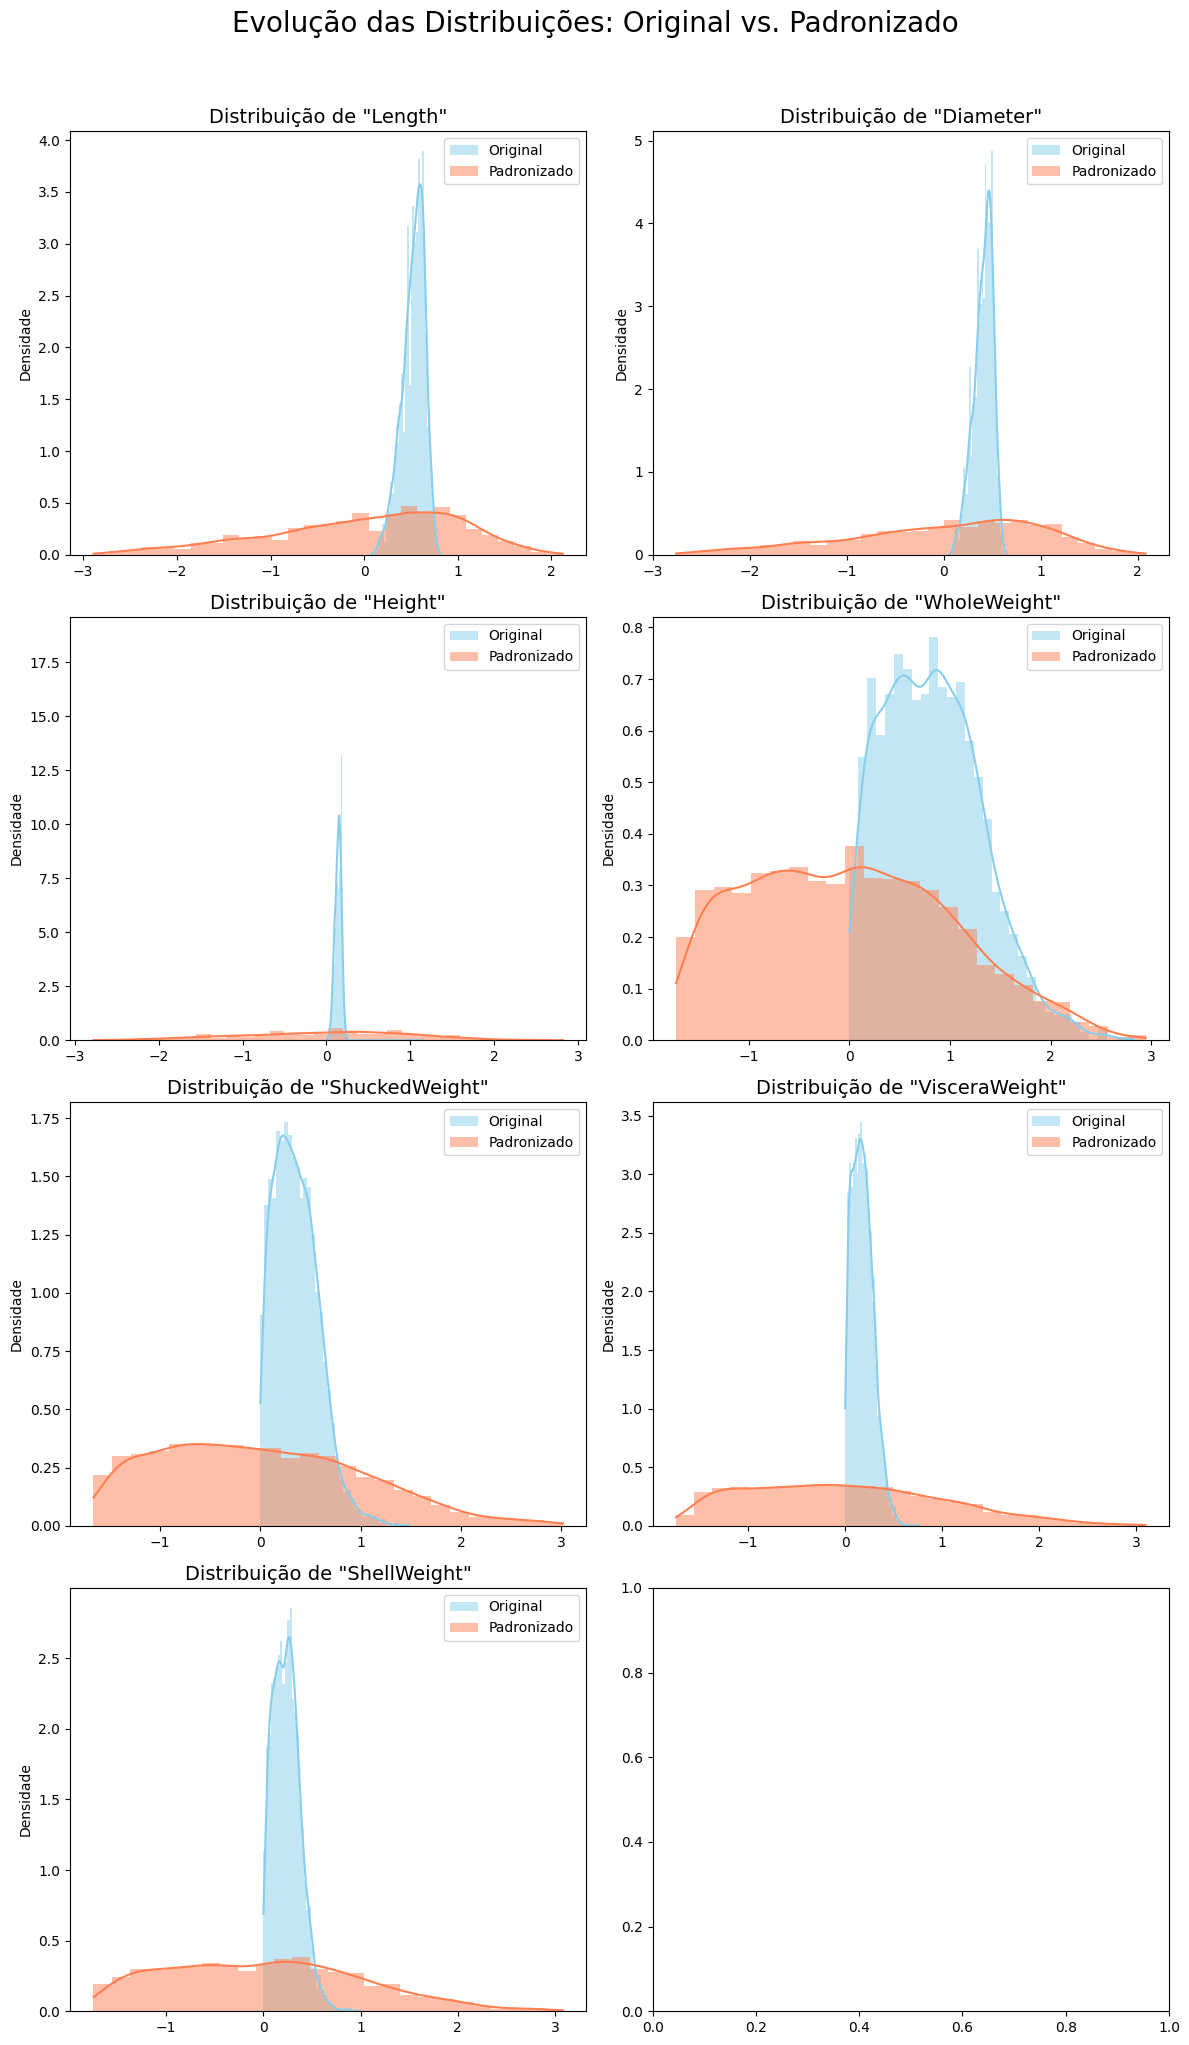

In [56]:

# Criação dos gráficos para comparação das distribuições
n_features = len(numeric_features)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(data=df, x=feature, color="skyblue", label='Original', kde=True, ax=ax, stat="density", linewidth=0)
    sns.histplot(data=df_processed_scaled, x=feature, color="coral", label='Padronizado', kde=True, ax=ax, stat="density", linewidth=0)
    ax.set_title(f'Distribuição de "{feature}"', fontsize=14)
    ax.legend()
    ax.set_xlabel('')
    ax.set_ylabel('Densidade')

fig.suptitle('Evolução das Distribuições: Original vs. Padronizado', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

/home/jonatas-brito/Trabalho-ML-2/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


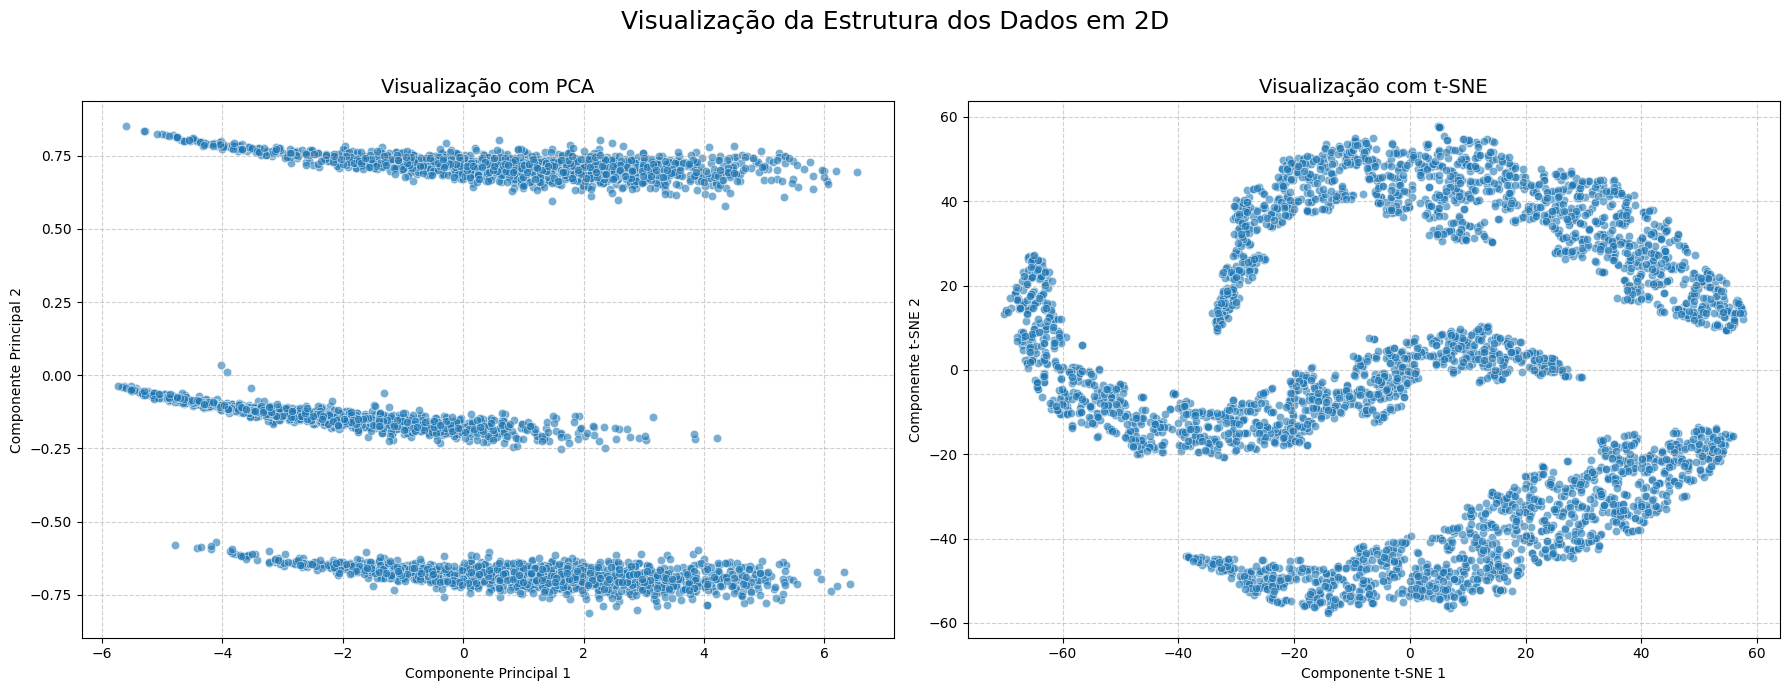

In [57]:
pca = PCA(n_components=2, random_state=42)
coordenadas_pca = pca.fit_transform(df_processed_scaled)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
coordenadas_tsne = tsne.fit_transform(df_processed_scaled)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

fig.suptitle('Visualização da Estrutura dos Dados em 2D', fontsize=18)

#PCA
sns.scatterplot(x=coordenadas_pca[:, 0], y=coordenadas_pca[:, 1], ax=axes[0], alpha=0.6)
axes[0].set_title('Visualização com PCA', fontsize=14)
axes[0].set_xlabel('Componente Principal 1')
axes[0].set_ylabel('Componente Principal 2')
axes[0].grid(True, linestyle='--', alpha=0.6)

#t-SNE
sns.scatterplot(x=coordenadas_tsne[:, 0], y=coordenadas_tsne[:, 1], ax=axes[1], alpha=0.6)
axes[1].set_title('Visualização com t-SNE', fontsize=14)
axes[1].set_xlabel('Componente t-SNE 1')
axes[1].set_ylabel('Componente t-SNE 2')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# K-MEANS (Jônatas)

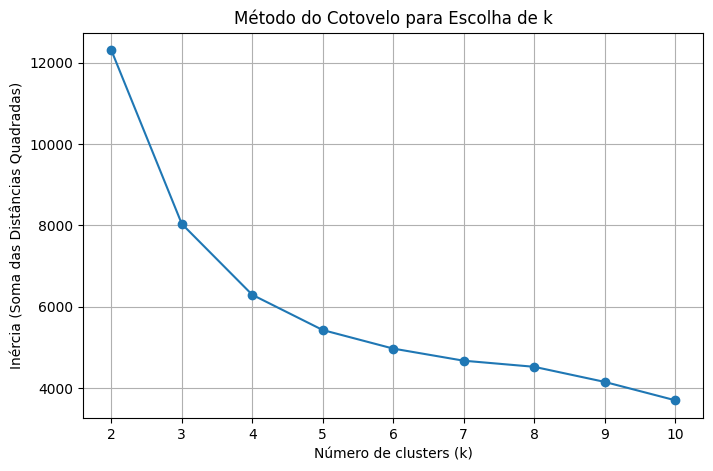

In [58]:
inertia = []
K_range = range(2, 11)

# Laço que mostra a inércia (soma das distâncias quadradas) para cada número de clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_processed_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia (Soma das Distâncias Quadradas)')
plt.title('Método do Cotovelo para Escolha de k')
plt.grid(True)
plt.show()

# O "cotovelo" indica onde a melhoria se estabiliza.

In [59]:
best_k = 3  # (Valor escolhido após análise do gráfico do método do cotovelo)
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(df_processed_scaled) # Aplica o modelo k-means aos dados padronizados
centroids = kmeans.cluster_centers_ # Calcula os centróides dos clusters



In [60]:
sil_score_kmeans = silhouette_score(df_processed_scaled, labels)
db_score_kmeans = davies_bouldin_score(df_processed_scaled, labels)
ch_score_kmeans = calinski_harabasz_score(df_processed_scaled, labels)

print(f"Silhouette Score: {sil_score_kmeans:.3f}")
print(f"Davies-Bouldin Score: {db_score_kmeans:.3f}")
print(f"Calinski-Harabasz Score: {ch_score_kmeans:.3f}")

# Interpretação:
# Silhouette Score avalia coesão e separação (-1 a 1)
# Davies-Bouldin mede similaridade entre clusters (quanto menor, melhor)
# Calinski-Harabasz avalia a razão entre dispersão entre e dentro dos clusters (quanto maior, melhor)


Silhouette Score: 0.382
Davies-Bouldin Score: 0.887
Calinski-Harabasz Score: 5706.627


/home/jonatas-brito/Trabalho-ML-2/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/jonatas-brito/Trabalho-ML-2/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


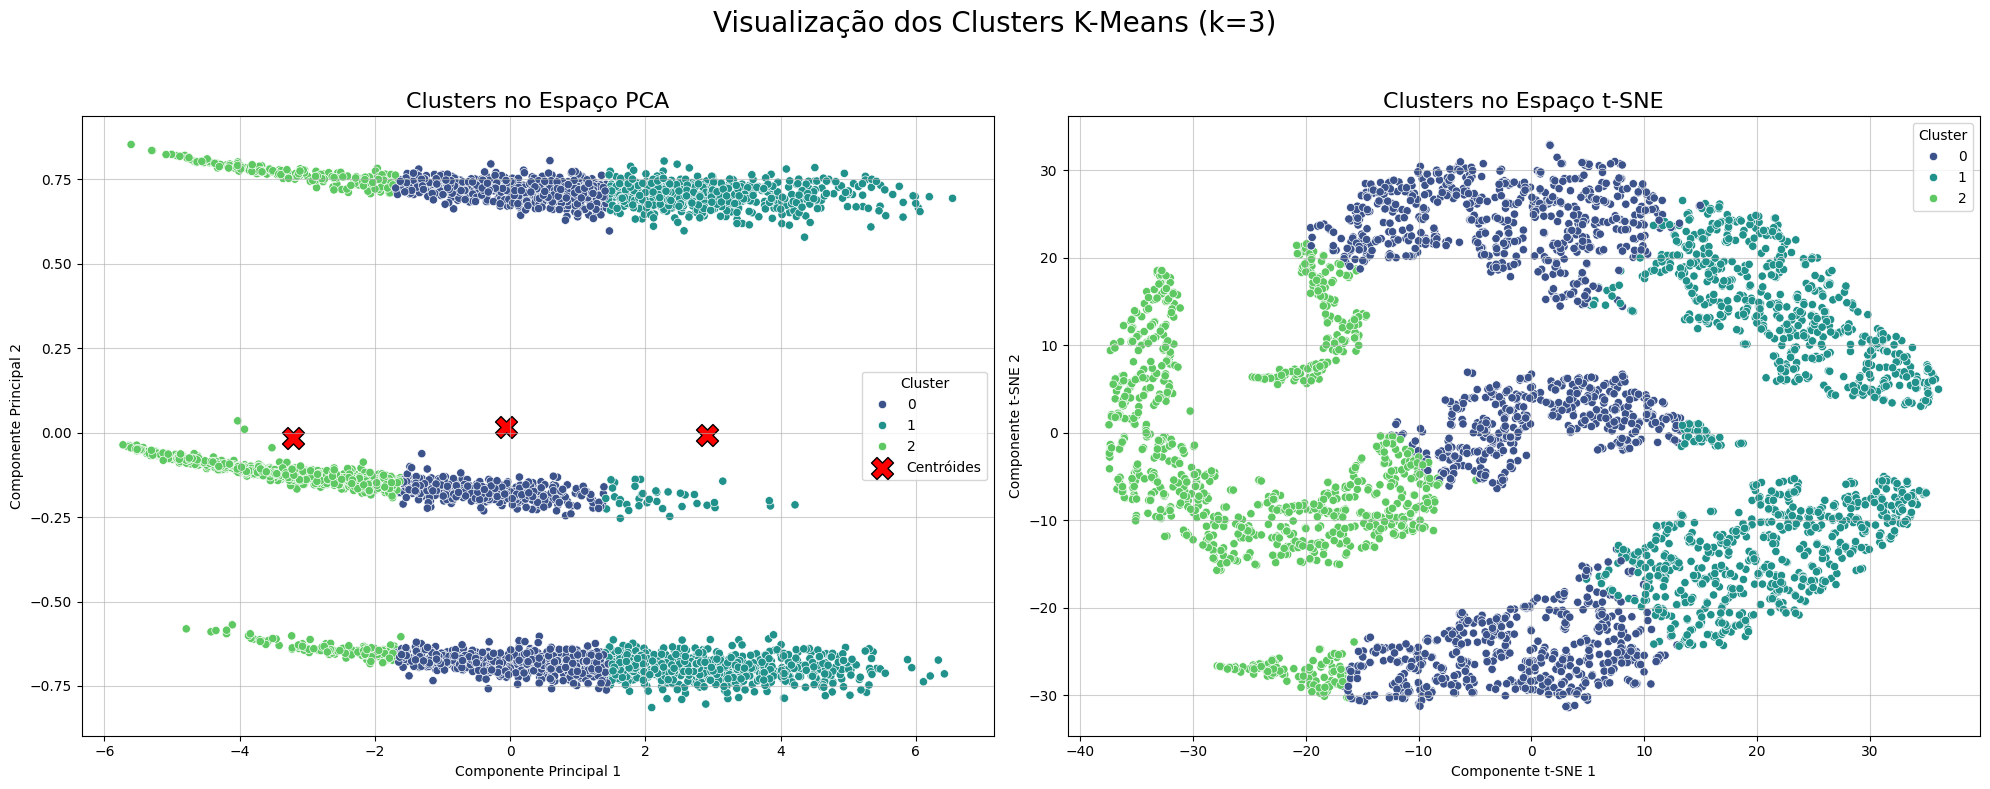

In [61]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando o t-SNE (ajustado para performance)
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
coordenadas_tsne = tsne.fit_transform(df_processed_scaled)

# Criando DataFrame para visualização
df_plot_kmeans = pd.DataFrame()
df_plot_kmeans['PCA1'] = coordenadas_pca[:, 0]
df_plot_kmeans['PCA2'] = coordenadas_pca[:, 1]
df_plot_kmeans['TSNE1'] = coordenadas_tsne[:, 0]
df_plot_kmeans['TSNE2'] = coordenadas_tsne[:, 1]
df_plot_kmeans['Cluster'] = pd.Categorical(labels)

# Gráfico PCA + t-SNE
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Visualização dos Clusters K-Means (k=3)', fontsize=20)

# PCA
sns.scatterplot(
    data=df_plot_kmeans,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='viridis',
    ax=axes[0]
)

# Centróides transformados com PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)
axes[0].scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    marker='X',
    s=250,
    c='red',
    edgecolor='black',
    label='Centróides'
)
axes[0].set_title('Clusters no Espaço PCA', fontsize=16)
axes[0].set_xlabel('Componente Principal 1')
axes[0].set_ylabel('Componente Principal 2')
axes[0].legend(title='Cluster')
axes[0].grid(True, alpha=0.6)

# t-SNE
sns.scatterplot(
    data=df_plot_kmeans,
    x='TSNE1',
    y='TSNE2',
    hue='Cluster',
    palette='viridis',
    ax=axes[1]
)
axes[1].set_title('Clusters no Espaço t-SNE', fontsize=16)
axes[1].set_xlabel('Componente t-SNE 1')
axes[1].set_ylabel('Componente t-SNE 2')
axes[1].legend(title='Cluster')
axes[1].grid(True, alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [62]:
# Usando o df_clean por ser o dataset original tratado sem os ruídos
df_clean['Cluster'] = labels  #kmeans.fit_predict

# Agrupamos por cluster e calculamos a média das features numéricas
numeric_cols = df_clean.select_dtypes(include='number').columns
print("Média dos Atributos Numéricos por Cluster:\n")
display(df_clean.groupby('Cluster')[numeric_cols].mean().round(2))

print("\n--- Análise Detalhada da Idade (Rings) por Cluster ---\n")
display(df_clean.groupby('Cluster')['Rings'].describe().round(2))


Média dos Atributos Numéricos por Cluster:



,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Cluster
Cluster,,,,,,,,,
0,0.54,0.42,0.14,0.76,0.33,0.17,0.23,10.38,0.0
1,0.64,0.50,0.18,1.34,0.58,0.29,0.38,11.57,1.0
2,0.38,0.29,0.10,0.29,0.12,0.06,0.09,7.53,2.0



--- Análise Detalhada da Idade (Rings) por Cluster ---



,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,1595.0,10.38,2.84,6.0,8.0,10.0,12.0,23.0
1,1289.0,11.57,2.95,6.0,10.0,11.0,13.0,29.0
2,1140.0,7.53,2.05,3.0,6.0,7.0,8.0,19.0


### 🧩 Conclusão da Clusterização com KMeans (k=3)

A **clusterização KMeans** aplicada aos abalones revelou agrupamentos coerentes com a variável **target** (`Rings`), mostrando uma clara separação por idade e porte físico.

As interpretações dos clusters foram as seguintes:

- 🔷 **Cluster 1**: Representa os **abalones mais velhos**, com **maior tamanho e peso**.
- 🟦 **Cluster 0**: Agrupa os **abalones intermediários**, com características moderadas.
- 🟢 **Cluster 2**: Reflete os **abalones mais jovens**, com **menor porte físico** e **idade mais baixa**.

> 📌 Os resultados indicam que o KMeans foi eficaz em identificar padrões reais de crescimento


# DBSCAN - Joabe

## Determinando os hiperparâmetros do DBSCAN

Valor de min_samples (2 * D): 20


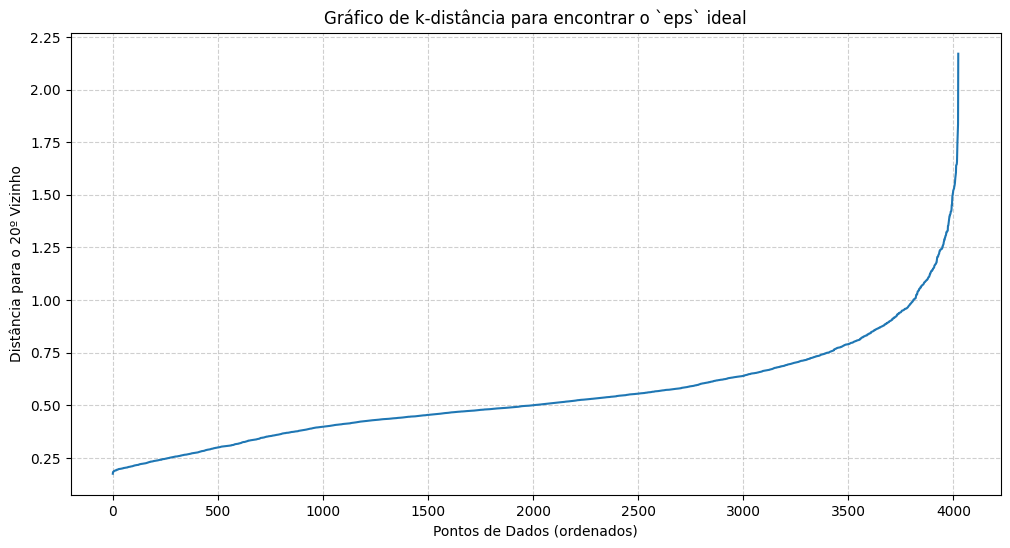

In [63]:
# 1. Definindo min_samples
D = df_processed_scaled.shape[1]
min_samples = 2*D
print(f"Valor de min_samples (2 * D): {min_samples}")

# 2. Encontrando o eps ideal com o gráfico de k-distância
k = min_samples
neighbors = NearestNeighbors(n_neighbors=k).fit(df_processed_scaled)
distances, indices = neighbors.kneighbors(df_processed_scaled)
k_distances = np.sort(distances[:, k-1], axis=0)

# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(k_distances)
plt.title('Gráfico de k-distância para encontrar o `eps` ideal')
plt.xlabel('Pontos de Dados (ordenados)')
plt.ylabel(f'Distância para o {k}º Vizinho')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [64]:
# Com base no gráfico, um valor em torno de 1.4 parece ser o ponto de cotovelo.
eps_escolhido = 1.2
print(f"\nValor de `eps` escolhido a partir do gráfico: {eps_escolhido}")


Valor de `eps` escolhido a partir do gráfico: 1.2


## Treinamento e Análise do Modelo DBSCAN

In [65]:
# Instanciando e treinando o modelo DBSCAN
dbscan = DBSCAN(eps=eps_escolhido, min_samples=min_samples)
clusters_dbscan = dbscan.fit_predict(df_processed_scaled)

# Analisando os resultados
n_clusters = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
n_noise = list(clusters_dbscan).count(-1)

print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de pontos de ruído (outliers): {n_noise}")
print("\nContagem de pontos por cluster:")
print(pd.Series(clusters_dbscan).value_counts())

Número de clusters encontrados: 3
Número de pontos de ruído (outliers): 10

Contagem de pontos por cluster:
 0    1464
 2    1282
 1    1268
-1      10
Name: count, dtype: int64


## Avaliação e Visualização dos Clusters

In [66]:
core_points_mask = clusters_dbscan != -1 #Excluindo o ruído para calcular as métricas
labels_core_points = clusters_dbscan[core_points_mask]
data_core_points = df_processed_scaled[core_points_mask]

sil_score_dbscan = silhouette_score(data_core_points, labels_core_points)
db_score_dbscan = davies_bouldin_score(data_core_points, labels_core_points)
ch_score_dbscan = calinski_harabasz_score(data_core_points, labels_core_points)

print(f"\nSilhouette Score: {sil_score_dbscan:.4f}")
print(f"Davies-Bouldin Score: {db_score_dbscan:.4f}")
print(f"Calinski-Harabasz Score: {ch_score_dbscan:.2f}")


Silhouette Score: 0.1667
Davies-Bouldin Score: 2.1691
Calinski-Harabasz Score: 1167.07


• Silhouette Score (0.1667): Baixo - clusters pouco definidos
• Davies-Bouldin Score (2.1691): Alto - clusters sobrepostos
• Calinski-Harabasz Score (1167.07): Moderado - definição razoável

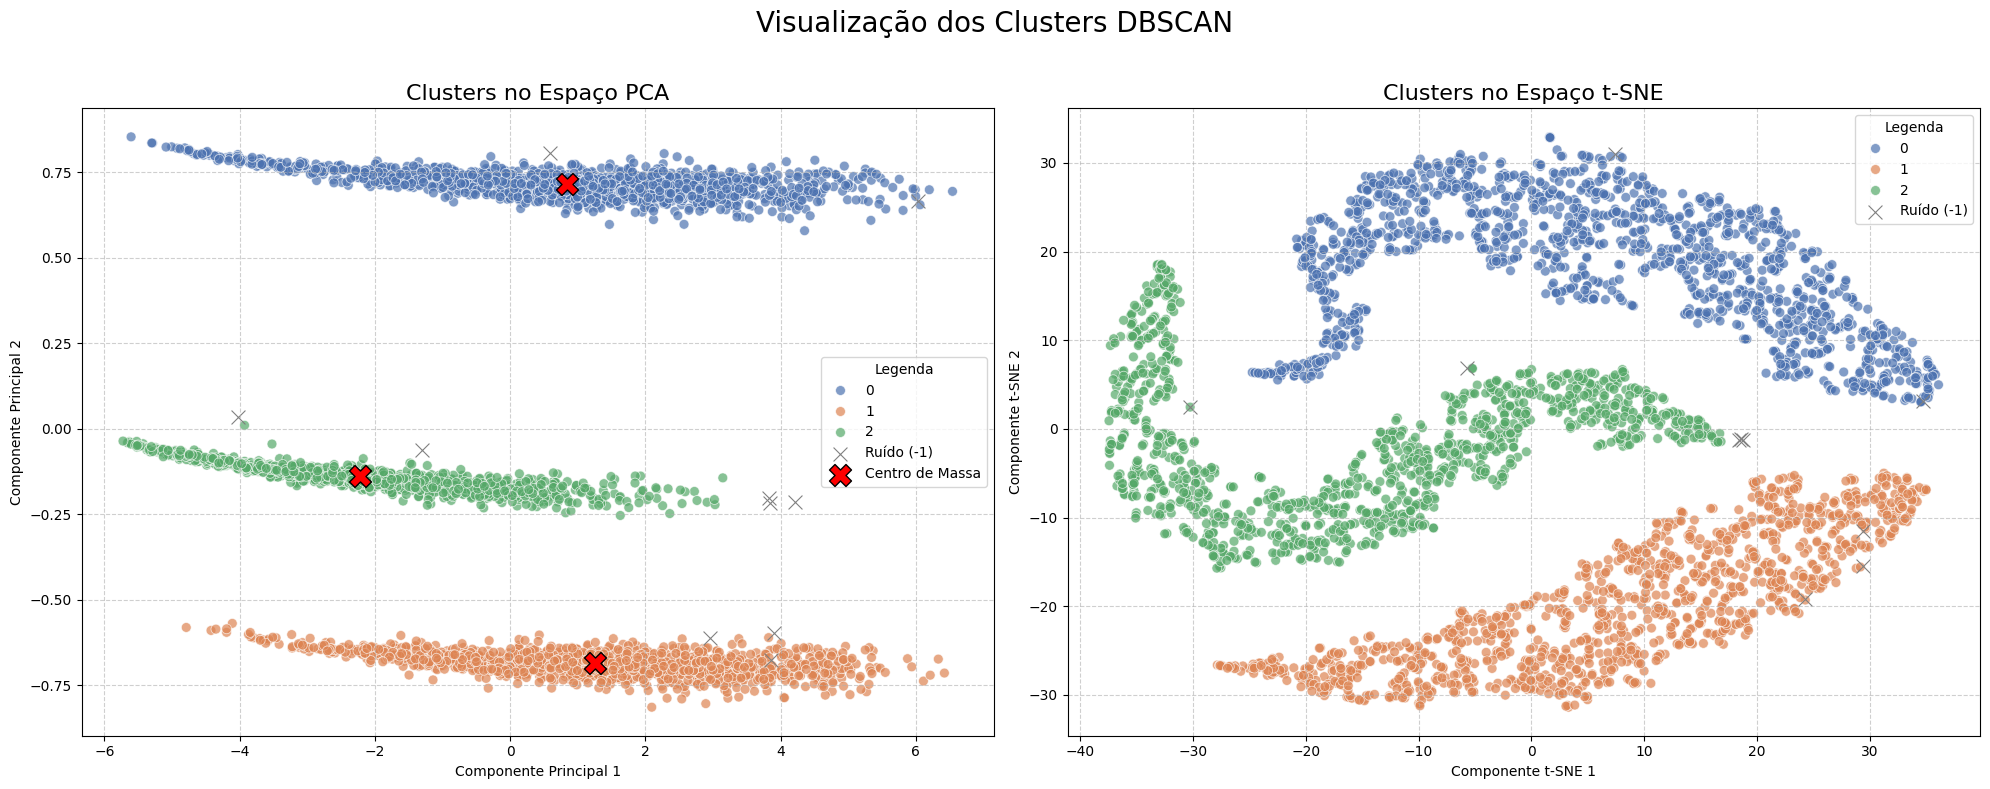

In [67]:
df_plot_dbscan = pd.DataFrame()
df_plot_dbscan['PCA1'] = coordenadas_pca[:, 0]
df_plot_dbscan['PCA2'] = coordenadas_pca[:, 1]
df_plot_dbscan['TSNE1'] = coordenadas_tsne[:, 0]
df_plot_dbscan['TSNE2'] = coordenadas_tsne[:, 1]
df_plot_dbscan['Cluster'] = clusters_dbscan

df_clusters = df_plot_dbscan[df_plot_dbscan['Cluster'] != -1]
df_noise = df_plot_dbscan[df_plot_dbscan['Cluster'] == -1]

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Visualização dos Clusters DBSCAN', fontsize=20)

ax_pca = axes[0]
sns.scatterplot(
    data=df_clusters, x='PCA1', y='PCA2', hue='Cluster',
    palette='deep', ax=ax_pca, s=50, alpha=0.7
)
sns.scatterplot(
    data=df_noise, x='PCA1', y='PCA2', color='gray',
    marker='x', s=100, ax=ax_pca, label='Ruído (-1)'
)

# Centroides
centroids_pca = df_clusters.groupby('Cluster')[['PCA1', 'PCA2']].mean()
ax_pca.scatter(
    centroids_pca['PCA1'], centroids_pca['PCA2'],
    marker='X', s=250, c='red', edgecolor='black', label='Centro de Massa'
)
ax_pca.set_title('Clusters no Espaço PCA', fontsize=16)
ax_pca.set_xlabel('Componente Principal 1')
ax_pca.set_ylabel('Componente Principal 2')
ax_pca.legend(title='Legenda')
ax_pca.grid(True, linestyle='--', alpha=0.6)

# --- Gráfico da Direita: t-SNE ---
ax_tsne = axes[1]
sns.scatterplot(
    data=df_clusters, x='TSNE1', y='TSNE2', hue='Cluster',
    palette='deep', ax=ax_tsne, s=50, alpha=0.7
)
sns.scatterplot(
    data=df_noise, x='TSNE1', y='TSNE2', color='gray',
    marker='x', s=100, ax=ax_tsne, label='Ruído (-1)'
)
ax_tsne.set_title('Clusters no Espaço t-SNE', fontsize=16)
ax_tsne.set_xlabel('Componente t-SNE 1')
ax_tsne.set_ylabel('Componente t-SNE 2')
ax_tsne.legend(title='Legenda')
ax_tsne.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Análise dos Clusters

In [68]:
# Adiciona os rótulos do DBSCAN ao DataFrame original
df_clean['Cluster'] = clusters_dbscan

# Filtra colunas numéricas para análise estatística
numeric_cols = df_clean.select_dtypes(include='number').columns

# Média dos atributos por cluster (ignorando outliers -1)
print("Média dos Atributos Numéricos por Cluster:\n")
display(df_clean[df_clean['Cluster'] != -1].groupby('Cluster')[numeric_cols].mean().round(2))

# Análise detalhada da idade (Rings)
print("\n--- Análise Detalhada da Idade (Rings) por Cluster ---\n")
display(df_clean[df_clean['Cluster'] != -1].groupby('Cluster')['Rings'].describe().round(2))


Média dos Atributos Numéricos por Cluster:



,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Cluster
Cluster,,,,,,,,,
0,0.56,0.44,0.15,0.95,0.42,0.21,0.27,10.66,0.0
1,0.58,0.45,0.16,1.02,0.43,0.22,0.29,11.06,1.0
2,0.44,0.33,0.11,0.44,0.20,0.09,0.13,8.03,2.0



--- Análise Detalhada da Idade (Rings) por Cluster ---



,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,1464.0,10.66,2.96,4.0,9.0,10.0,12.0,26.0
1,1268.0,11.06,3.05,5.0,9.0,10.0,12.0,29.0
2,1282.0,8.03,2.41,3.0,6.0,8.0,9.0,21.0


## Análise de correlação com o Sexo do Abalone

In [69]:
pd.crosstab(clusters_dbscan, df_clean['Sex'], normalize='index').round(2)


Sex,F,I,M
row_0,,,
-1,0.3,0.5,0.2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0


### 🧩 Conclusão Final: DBSCAN separou por sexo

A clusterização com **DBSCAN** foi extremamente eficaz ao separar os dados dos abalones **por sexo** com 100% de pureza em cada cluster:

- 🔵 **Cluster 0**: Exclusivamente **machos**
- 🟣 **Cluster 1**: Exclusivamente **fêmeas**
- 🟢 **Cluster 2**: Exclusivamente **infantis**

> 📌 Isso demonstra que as características físicas dos abalones são fortemente determinadas pelo sexo, e que o DBSCAN capturou essas diferenças

## 🔗 Clusterização Hierárquica (João Pedro)

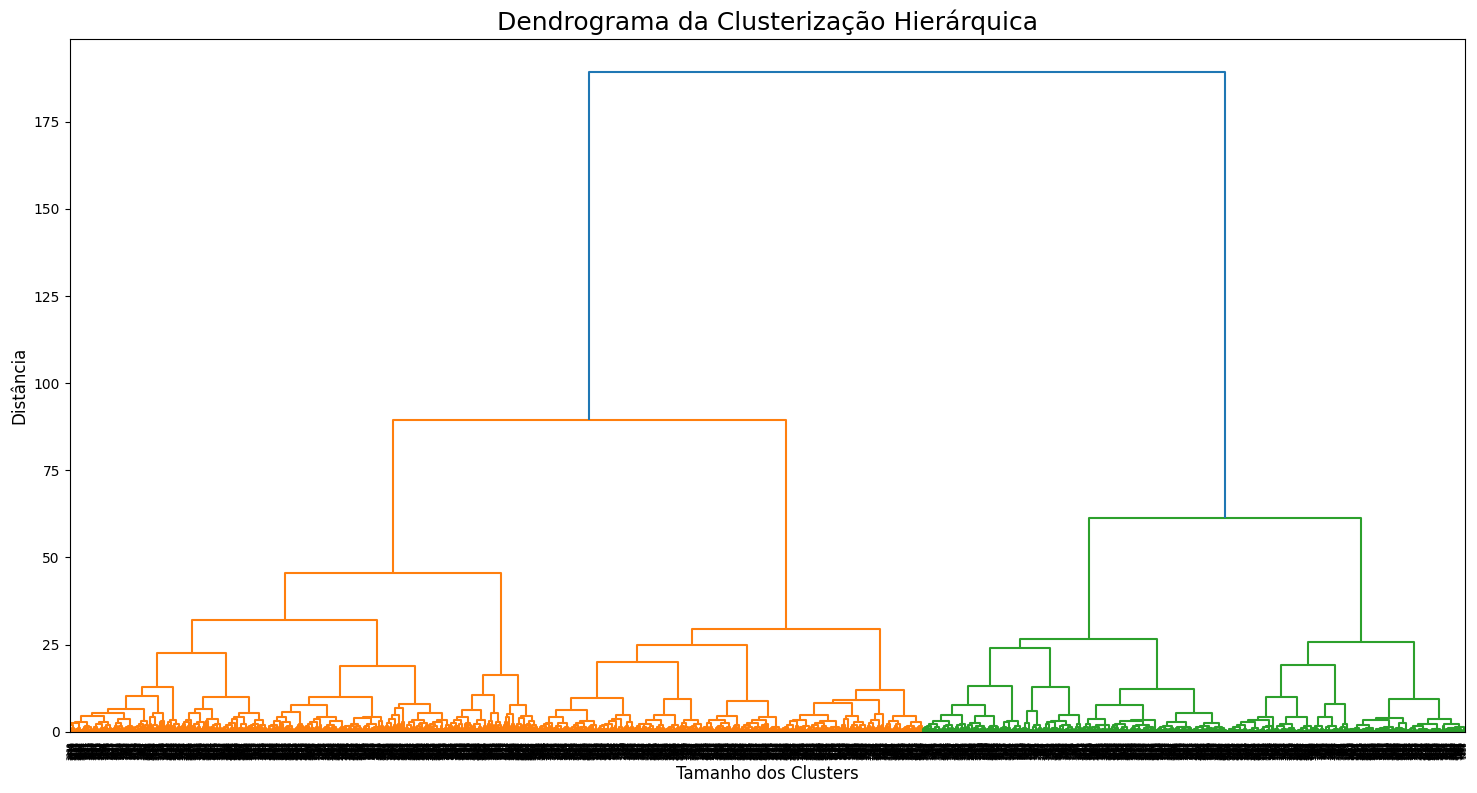

In [70]:
linked = linkage(df_processed_scaled, method='ward') # método ward para minimizar a variâncias dentro dos clusters

# Plotando o dendrograma
plt.figure(figsize=(18, 9))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)

plt.title('Dendrograma da Clusterização Hierárquica', fontsize=18)
plt.xlabel('Tamanho dos Clusters', fontsize=12)
plt.ylabel('Distância', fontsize=12)
plt.show()

In [71]:
k_hierarquico = 3

hierarchical_cluster = AgglomerativeClustering(n_clusters=k_hierarquico, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical_cluster.fit_predict(df_processed_scaled)

# Calculando as métricas
sil_score_h = silhouette_score(df_processed_scaled, hierarchical_labels)
db_score_h = davies_bouldin_score(df_processed_scaled, hierarchical_labels)
ch_score_h = calinski_harabasz_score(df_processed_scaled, hierarchical_labels)

# Exibindo os resultados
print(f"\nSilhouette Score: {sil_score_h:.4f}")
print(f"Davies-Bouldin Score: {db_score_h:.4f}")
print(f"Calinski-Harabasz Score: {ch_score_h:.2f}")



Silhouette Score: 0.3225
Davies-Bouldin Score: 1.0034
Calinski-Harabasz Score: 4928.96


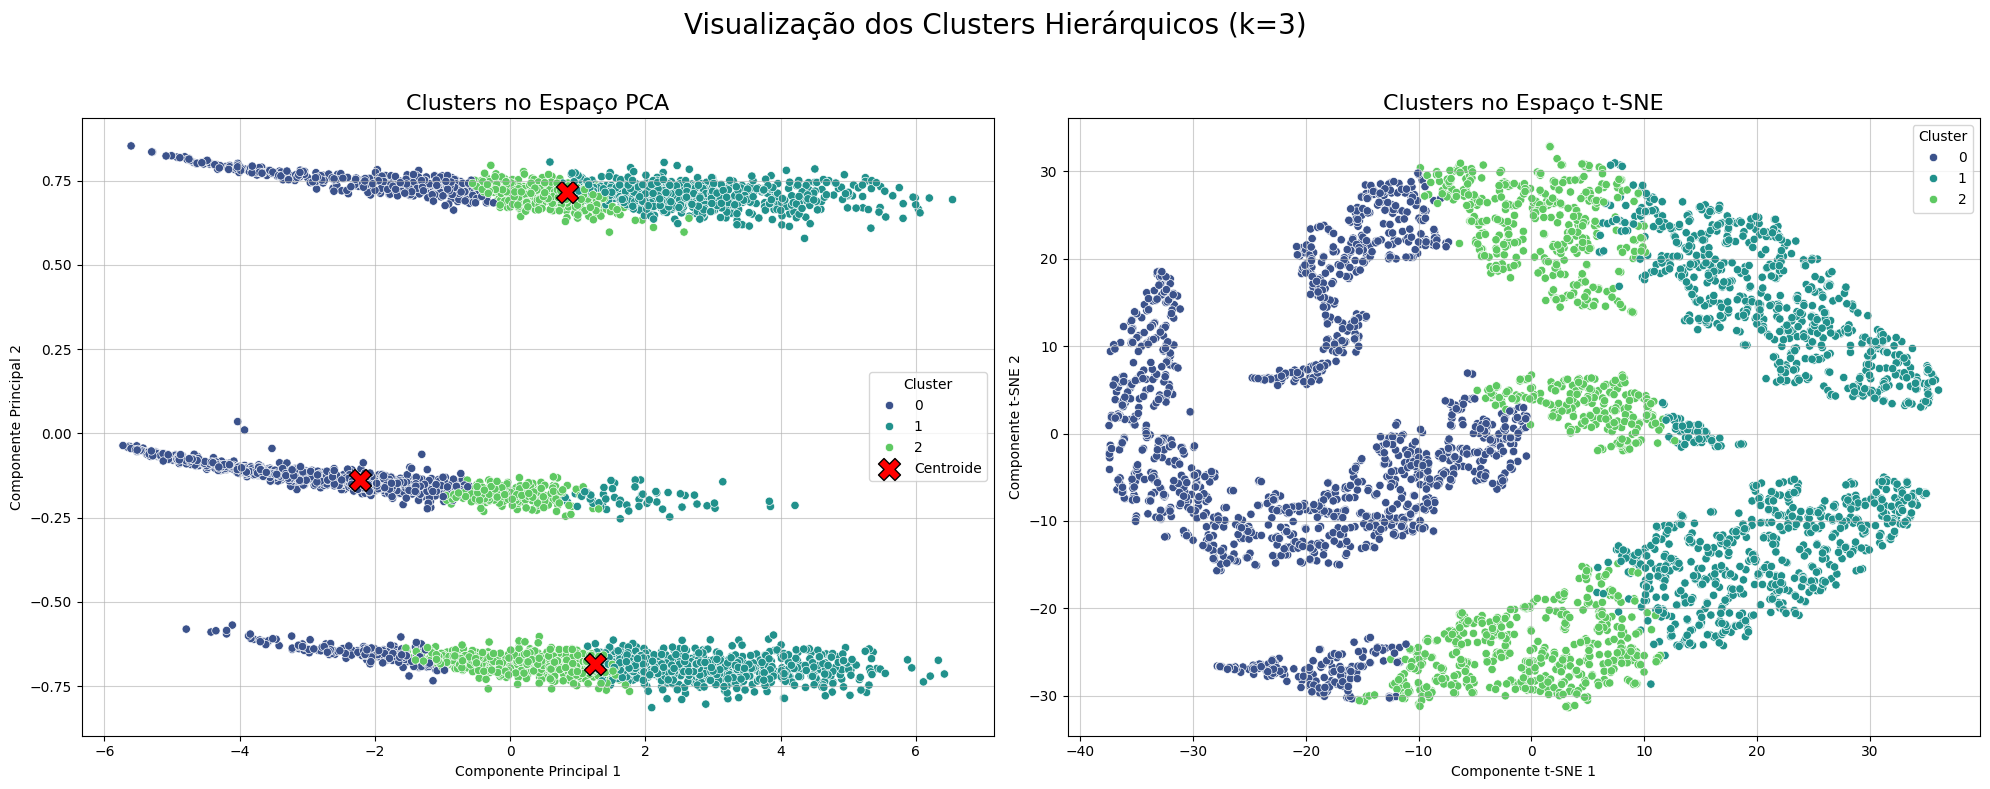

In [72]:
df_plot_hierarchical = pd.DataFrame()
df_plot_hierarchical['PCA1'] = coordenadas_pca[:, 0]
df_plot_hierarchical['PCA2'] = coordenadas_pca[:, 1]
df_plot_hierarchical['TSNE1'] = coordenadas_tsne[:, 0]
df_plot_hierarchical['TSNE2'] = coordenadas_tsne[:, 1]
df_plot_hierarchical['Cluster'] = pd.Categorical(hierarchical_labels)


# --- 2. CRIAÇÃO DOS GRÁFICOS ---
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Visualização dos Clusters Hierárquicos (k=3)', fontsize=20)

# PCA
sns.scatterplot(
    data=df_plot_hierarchical,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='viridis',
    ax=axes[0]
)
# Centroides
centroids_pca = df_clusters.groupby('Cluster')[['PCA1', 'PCA2']].mean()
axes[0].scatter(
    centroids_pca['PCA1'], centroids_pca['PCA2'],
    marker='X', s=250, c='red', edgecolor='black', label='Centroide'
)

axes[0].set_title('Clusters no Espaço PCA', fontsize=16)
axes[0].set_xlabel('Componente Principal 1')
axes[0].set_ylabel('Componente Principal 2')
axes[0].grid(True, alpha=0.6)
axes[0].legend(title='Cluster')


# t-SNE
sns.scatterplot(
    data=df_plot_hierarchical,
    x='TSNE1',
    y='TSNE2',
    hue='Cluster',
    palette='viridis',
    ax=axes[1]
)
axes[1].set_title('Clusters no Espaço t-SNE', fontsize=16)
axes[1].set_xlabel('Componente t-SNE 1')
axes[1].set_ylabel('Componente t-SNE 2')
axes[1].grid(True, alpha=0.6)
axes[1].legend(title='Cluster')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Análise dos Cluster com o Target Rings

In [73]:
# Usando o df_clean por ser o dataset original tratado sem os ruídos
df_clean['Cluster'] = hierarchical_labels

# Agrupamos por cluster e calculamos a média das features numéricas
numeric_cols = df_clean.select_dtypes(include=['number']).columns
display(df_clean.groupby('Cluster')[numeric_cols].mean().round(2))

print("\n--- Análise Detalhada da Idade (Rings) por Cluster ---")
display(df_clean.groupby('Cluster')['Rings'].describe().round(2))

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Cluster
Cluster,,,,,,,,,
0,0.41,0.31,0.10,0.36,0.16,0.08,0.11,8.06,0.0
1,0.64,0.50,0.17,1.32,0.58,0.29,0.37,11.43,1.0
2,0.55,0.43,0.15,0.82,0.35,0.18,0.24,10.82,2.0



--- Análise Detalhada da Idade (Rings) por Cluster ---


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,1563.0,8.06,2.32,3.0,7.0,8.0,9.0,21.0
1,1352.0,11.43,2.90,6.0,10.0,11.0,12.0,29.0
2,1109.0,10.82,3.03,6.0,9.0,10.0,12.0,26.0


### 🧩 Conclusão da Clusterização Hierárquica

A **clusterização hierárquica** aplicada sobre os abalones revelou agrupamentos coerentes com a variável **target** (rings), que conseguiu atribuir que: quanto maior e mais pesado o abalone, mais velho ele será.

As interpretações dos clusters foram as seguintes:

- 🟦 **Cluster 0**: Representa os **abalones mais jovens**, com **menor porte físico** e **peso mais leve**.
- 🟢 **Cluster 2**: Abrange os **abalones intermediários**, situando-se entre os extremos de idade e características físicas.
- 🔷 **Cluster 1**: Representa os **abalones mais velhos**, caracterizados por **maior tamanho e peso**.

> 📌 Os resultados apresentados mostram que a Clusterização Hierárquica foi bem sucedida, encontrando padrões que diferenciam as idades dos abalones.


## Comparativo Final das Métricas

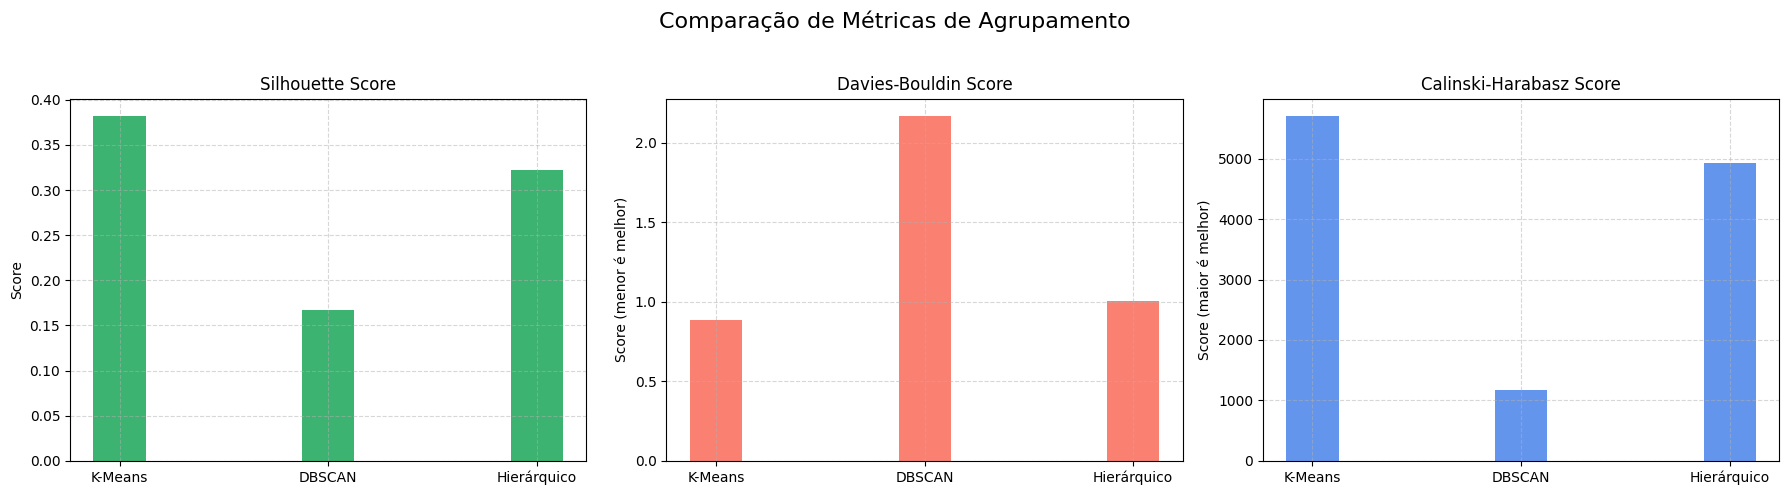

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Dados das métricas
metodos = ['K-Means', 'DBSCAN', 'Hierárquico']

silhouette = [0.382, 0.1667, 0.3225]
davies_bouldin = [0.887, 2.1691, 1.0034]
calinski_harabasz = [5706.627, 1167.07, 4928.96]

# Configurações do gráfico
x = np.arange(len(metodos))
largura = 0.25

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Comparação de Métricas de Agrupamento', fontsize=16)

# Silhouette Score
axs[0].bar(x, silhouette, width=largura, color='mediumseagreen')
axs[0].set_title('Silhouette Score')
axs[0].set_xticks(x)
axs[0].set_xticklabels(metodos)
axs[0].set_ylabel('Score')
axs[0].grid(True, linestyle='--', alpha=0.5)

# Davies-Bouldin Score
axs[1].bar(x, davies_bouldin, width=largura, color='salmon')
axs[1].set_title('Davies-Bouldin Score')
axs[1].set_xticks(x)
axs[1].set_xticklabels(metodos)
axs[1].set_ylabel('Score (menor é melhor)')
axs[1].grid(True, linestyle='--', alpha=0.5)

# Calinski-Harabasz Score
axs[2].bar(x, calinski_harabasz, width=largura, color='cornflowerblue')
axs[2].set_title('Calinski-Harabasz Score')
axs[2].set_xticks(x)
axs[2].set_xticklabels(metodos)
axs[2].set_ylabel('Score (maior é melhor)')
axs[2].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
